Dataset shape: (1465, 16)

Columns: ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']

Missing values:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Exact duplicates: 0

Numeric Summary:
        discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1464.000000   
mean        3125.310874    5444.990635            47.691468     4.096585   
std         6944.3043

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


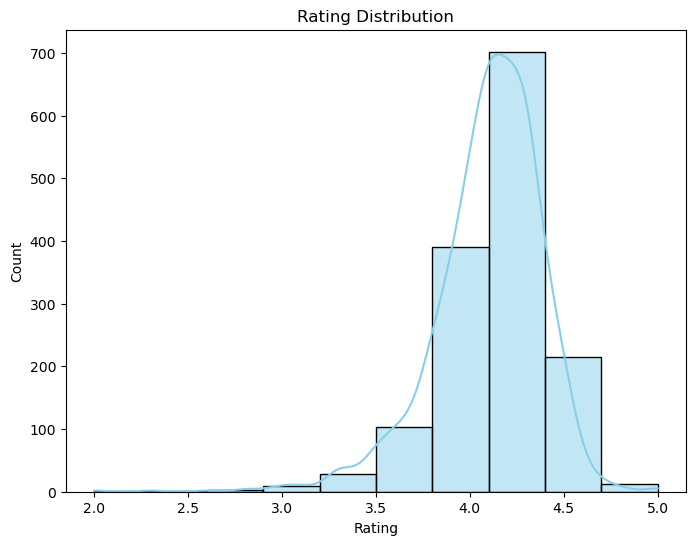

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


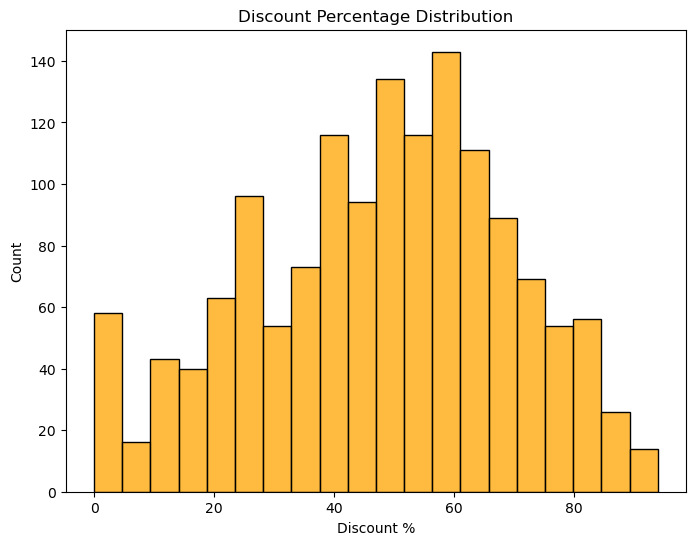

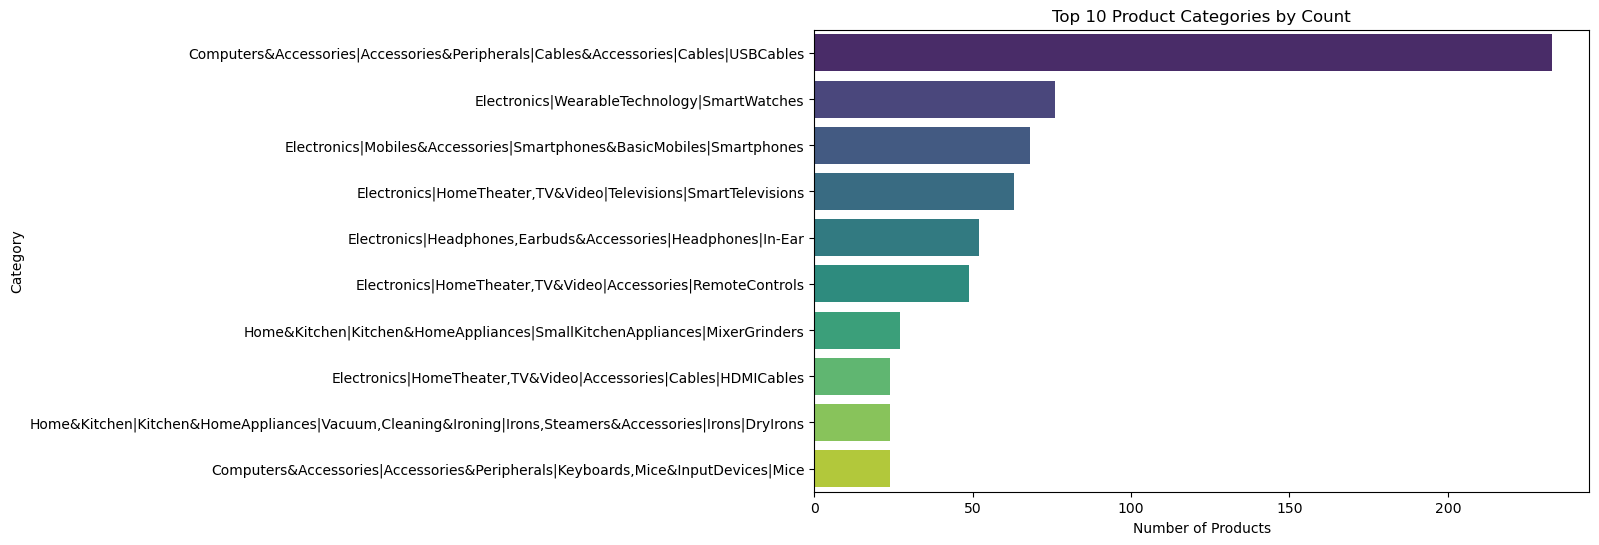

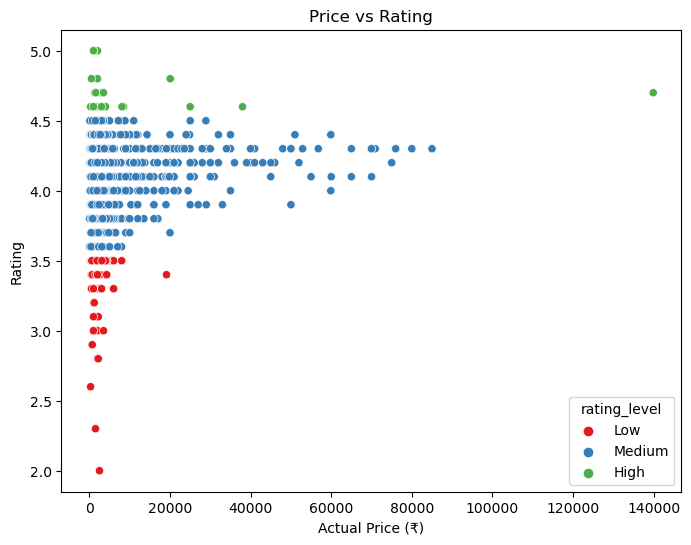

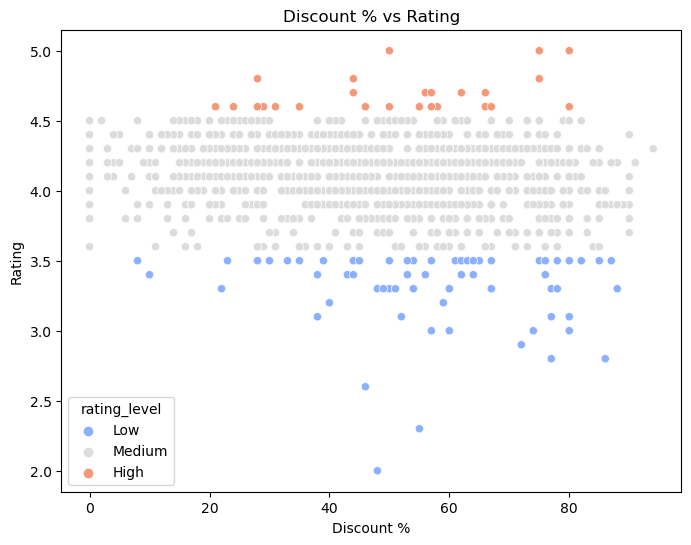


Category Performance (Top 10):
                                                     product_count  avg_rating  \
category                                                                        
Computers&Accessories|Accessories&Peripherals|C...            233    4.151931   
Electronics|WearableTechnology|SmartWatches                    76    4.025000   
Electronics|Mobiles&Accessories|Smartphones&Bas...             68    4.100000   
Electronics|HomeTheater,TV&Video|Televisions|Sm...             63    4.209524   
Electronics|Headphones,Earbuds&Accessories|Head...             52    3.898077   
Electronics|HomeTheater,TV&Video|Accessories|Re...             49    3.800000   
Home&Kitchen|Kitchen&HomeAppliances|SmallKitche...             27    4.011111   
Electronics|HomeTheater,TV&Video|Accessories|Ca...             24    4.254167   
Computers&Accessories|Accessories&Peripherals|K...             24    4.287500   
Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Clea...             24    4.12916

In [1]:
# ===============================================
# Amazon E-commerce EDA - Complete Python Code
# ===============================================

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import chi2_contingency

# -----------------------------
# 1️⃣ Load the dataset
# -----------------------------
df = pd.read_csv("amazon_eda_python.csv")

# Show dataset info
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nExact duplicates:", df.duplicated().sum())

# -----------------------------
# 2️⃣ Create folder for plots
# -----------------------------
plot_folder = "plots"
if not os.path.exists(plot_folder):
    os.makedirs(plot_folder)

# -----------------------------
# 3️⃣ Data Cleaning
# -----------------------------
# Remove currency symbols and commas, convert to numeric
df['discounted_price'] = df['discounted_price'].str.replace('[₹,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].str.replace('[₹,]', '', regex=True).astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '', regex=True).astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace(',', '', regex=True)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Feature Engineering
df['discount_amount'] = df['actual_price'] - df['discounted_price']

# Rating levels
bins = [0, 3.5, 4.5, 5]
labels = ['Low', 'Medium', 'High']
df['rating_level'] = pd.cut(df['rating'], bins=bins, labels=labels, include_lowest=True)

# Price bins (quantiles)
df['price_bin_quantile'] = pd.qcut(df['actual_price'], 4, labels=['Q1','Q2','Q3','Q4'])

# -----------------------------
# 4️⃣ Descriptive Statistics
# -----------------------------
print("\nNumeric Summary:\n", df[['discounted_price','actual_price','discount_percentage','rating','rating_count']].describe())

# Top categories by count
top_categories = df['category'].value_counts().head(10)
print("\nTop 10 Categories:\n", top_categories)

# -----------------------------
# 5️⃣ Visualizations
# -----------------------------

# 5.1 Rating Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.savefig(f"{plot_folder}/rating_distribution.png", bbox_inches='tight')
plt.show()

# 5.2 Discount Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['discount_percentage'], bins=20, color='orange')
plt.title("Discount Percentage Distribution")
plt.xlabel("Discount %")
plt.ylabel("Count")
plt.savefig(f"{plot_folder}/discount_distribution.png", bbox_inches='tight')
plt.show()

# 5.3 Top Categories by Product Count
plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Top 10 Product Categories by Count")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.savefig(f"{plot_folder}/top_categories.png", bbox_inches='tight')
plt.show()

# 5.4 Price vs Rating Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='actual_price', y='rating', data=df, hue='rating_level', palette='Set1')
plt.title("Price vs Rating")
plt.xlabel("Actual Price (₹)")
plt.ylabel("Rating")
plt.savefig(f"{plot_folder}/price_vs_rating.png", bbox_inches='tight')
plt.show()

# 5.5 Discount vs Rating Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='discount_percentage', y='rating', data=df, hue='rating_level', palette='coolwarm')
plt.title("Discount % vs Rating")
plt.xlabel("Discount %")
plt.ylabel("Rating")
plt.savefig(f"{plot_folder}/discount_vs_rating.png", bbox_inches='tight')
plt.show()

# -----------------------------
# 6️⃣ Category Performance
# -----------------------------
category_perf = df.groupby('category').agg(
    product_count=('product_id','count'),
    avg_rating=('rating','mean'),
    median_price=('actual_price','median'),
    avg_discount_pct=('discount_percentage','mean'),
    total_reviews=('rating_count','sum')
).sort_values(by='product_count', ascending=False).head(10)

print("\nCategory Performance (Top 10):\n", category_perf)

# -----------------------------
# 7️⃣ Chi-Square Test: Price vs Rating Level
# -----------------------------
contingency = pd.crosstab(df['price_bin_quantile'], df['rating_level'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("\nContingency Table:\n", contingency)
print(f"\nChi-square test: chi2={chi2:.4f}, p={p:.4f}, dof={dof}")
if p < 0.05:
    print("Result: Reject null — rating level is associated with price bin")
else:
    print("Result: Fail to reject null — no significant association")

# -----------------------------
# 8️⃣ Save cleaned dataset
# -----------------------------
df.to_csv("amazon_ecom_cleaned.csv", index=False)
print("\nCleaned dataset saved to 'amazon_ecom_cleaned.csv'")

# -----------------------------
# 9️⃣ Save a basic markdown report
# -----------------------------
with open("amazon_eda_report.md", "w") as f:
    f.write("# Amazon E-commerce EDA Report\n\n")
    f.write("This report contains insights from exploratory data analysis of Amazon products.\n\n")
    f.write("## Top Categories\n\n")
    f.write(category_perf.to_markdown())
    f.write("\n\n## Chi-Square Test\n\n")
    f.write(f"Chi-square={chi2:.4f}, p-value={p:.4f}\n")
    f.write("Result: " + ("Reject null — rating level is associated with price bin" if p<0.05 else "Fail to reject null — no significant association") + "\n")
print("Markdown report saved to 'amazon_eda_report.md'")

print("\nNotebook run complete. All charts saved in 'plots/' folder.")
